## AML_S2020_hw2_task2_cs3913

### Task 2 Regression on Sydney Dataset

In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.impute import SimpleImputer 
import seaborn as sns 

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read data
data2 = pd.read_csv('data.csv')

In [3]:
# for this assignment, could ignore 'date'
data2 = data2.drop(columns = ['date'])

In [4]:
data2.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


### 2.1 Determine which features are continuous vs categorical. Drop rows without a valid sales price.

In [5]:
data2.dtypes

price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

- continuous variables: 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built'

- categorical variables: 'waterfront', 'street', 'city', 'statezip', 'country','yr_renovated'

Here, 'street', 'city', 'statezip', 'country' are all 'object' types. Besides, 'waterfront' only takes 0/1, 'yr_renovated' indicates when the house is renovated(if not, it would be 0). Therefore, they are all treated as categorical variables.

In [6]:
# Drop rows without a valid sales price
data2 = data2[data2.price != 0]
# We also drop 'street'&'country' because it does not help for price prediction
data2 = data2.drop(columns = ['street','country'])

In [7]:
data2['waterfront'] = data2.waterfront.astype('category')
data2['yr_renovated'] = data2.yr_renovated.astype('category')
data2['city'] = data2.city.astype('category')
data2['statezip'] = data2.statezip.astype('category')

In [8]:
data2.dtypes

price             float64
bedrooms          float64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront       category
view                int64
condition           int64
sqft_above          int64
sqft_basement       int64
yr_built            int64
yr_renovated     category
city             category
statezip         category
dtype: object

### 2.2 Visualize the univariate distribution of each continuous feature, and the distribution of the target. Do you notice anything? Is there something that might require special treatment?

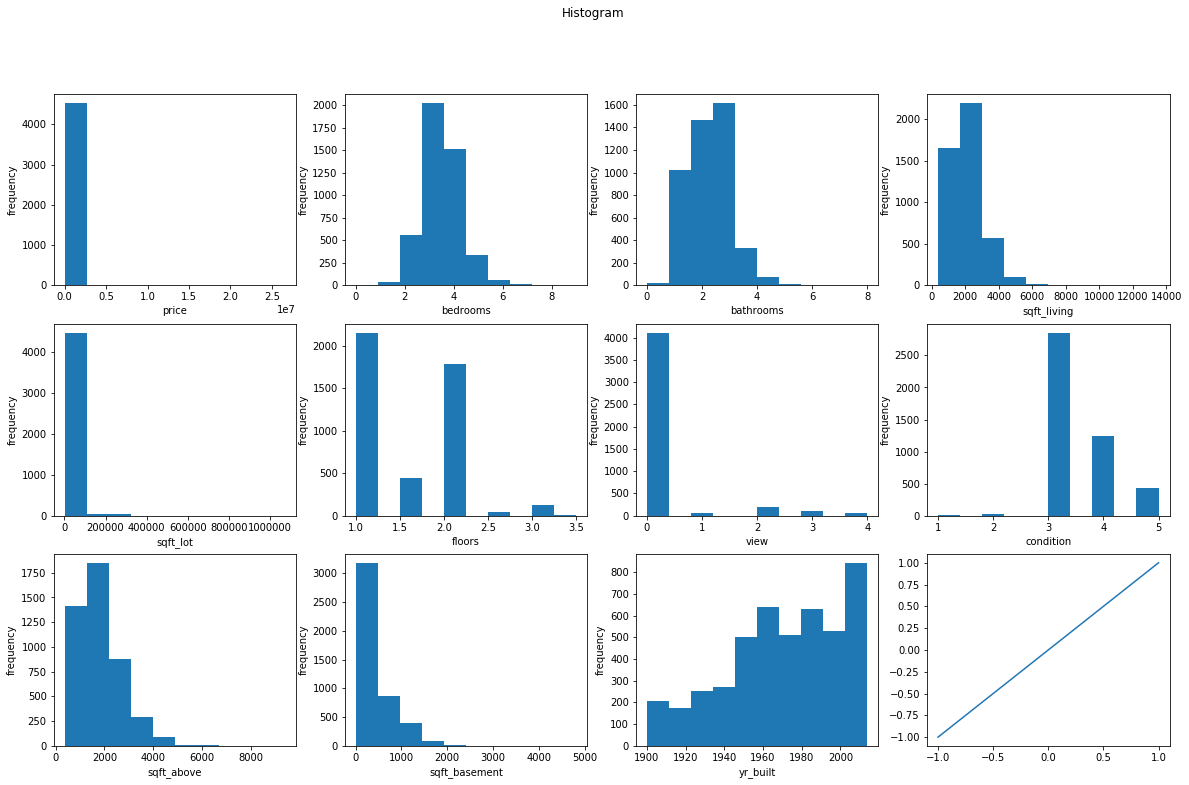

In [9]:
fig, axes = plt.subplots(3, 4, figsize=(20,12))
plt.suptitle('Histogram')

axes[0,0].hist(data2.price)
axes[0,0].set_xlabel('price')
axes[0,0].set_ylabel('frequency')

axes[0,1].hist(data2.bedrooms)
axes[0,1].set_xlabel('bedrooms')
axes[0,1].set_ylabel('frequency')

axes[0,2].hist(data2.bathrooms)
axes[0,2].set_xlabel('bathrooms')
axes[0,2].set_ylabel('frequency')

axes[0,3].hist(data2.sqft_living)
axes[0,3].set_xlabel('sqft_living')
axes[0,3].set_ylabel('frequency')

axes[1,0].hist(data2.sqft_lot)
axes[1,0].set_xlabel('sqft_lot')
axes[1,0].set_ylabel('frequency')

axes[1,1].hist(data2.floors)
axes[1,1].set_xlabel('floors')
axes[1,1].set_ylabel('frequency')

axes[1,2].hist(data2.view)
axes[1,2].set_xlabel('view')
axes[1,2].set_ylabel('frequency')

axes[1,3].hist(data2.condition)
axes[1,3].set_xlabel('condition')
axes[1,3].set_ylabel('frequency')

axes[2,0].hist(data2.sqft_above)
axes[2,0].set_xlabel('sqft_above')
axes[2,0].set_ylabel('frequency')

axes[2,1].hist(data2.sqft_basement)
axes[2,1].set_xlabel('sqft_basement')
axes[2,1].set_ylabel('frequency')

axes[2,2].hist(data2.yr_built)
axes[2,2].set_xlabel('yr_built')
axes[2,2].set_ylabel('frequency')

axes[2,3].plot([-1, 1], [-1, 1])

plt.show()

**Do you notice anything? Is there something that might require special treatment?**
- 'price', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above' and 'sqft_basement' are right-skewed. We need to take log transformation for these variables

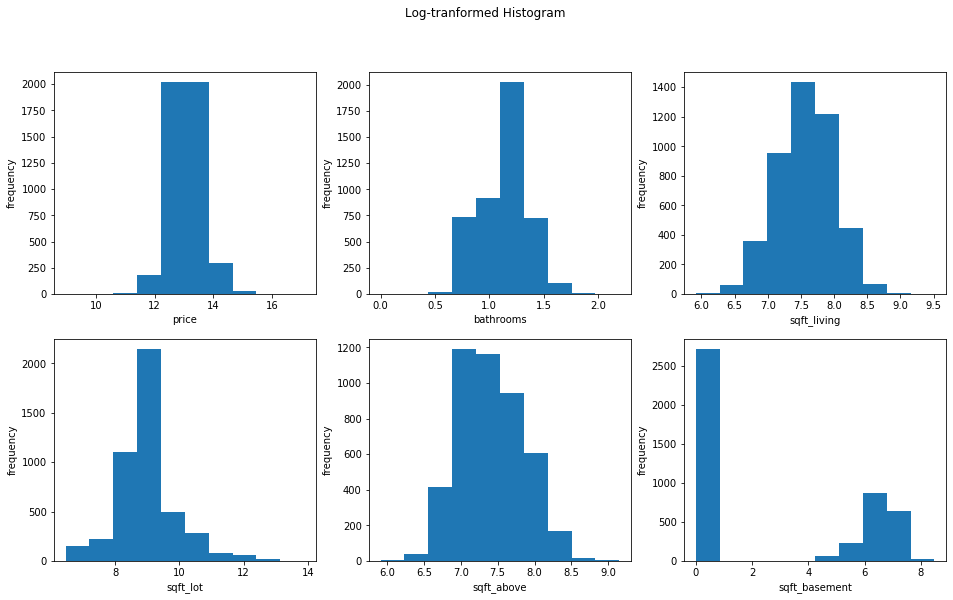

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(16,9))
plt.suptitle('Log-tranformed Histogram')

axes[0,0].hist(np.log(data2.price))
axes[0,0].set_xlabel('price')
axes[0,0].set_ylabel('frequency')

axes[0,1].hist(np.log(data2.bathrooms+1))
axes[0,1].set_xlabel('bathrooms')
axes[0,1].set_ylabel('frequency')

axes[0,2].hist(np.log(data2.sqft_living))
axes[0,2].set_xlabel('sqft_living')
axes[0,2].set_ylabel('frequency')

axes[1,0].hist(np.log(data2.sqft_lot))
axes[1,0].set_xlabel('sqft_lot')
axes[1,0].set_ylabel('frequency')


axes[1,1].hist(np.log(data2.sqft_above))
axes[1,1].set_xlabel('sqft_above')
axes[1,1].set_ylabel('frequency')

axes[1,2].hist(np.log(data2.sqft_basement+1))
axes[1,2].set_xlabel('sqft_basement')
axes[1,2].set_ylabel('frequency')

plt.show()

### 2.3 Visualize the dependency of the target on each continuous feature

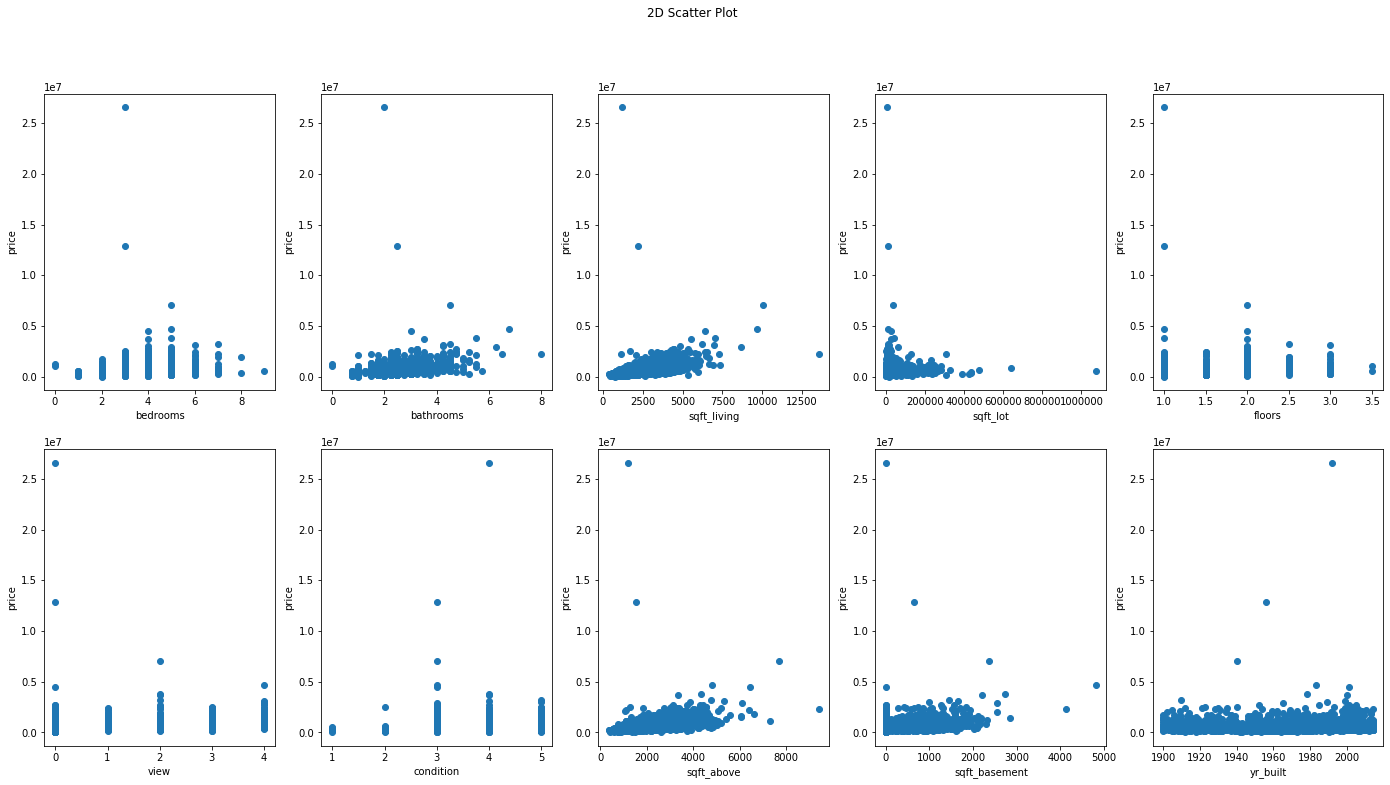

In [11]:
# 2d scatter plot
fig, axes = plt.subplots(2, 5, figsize=(24,12))
plt.suptitle('2D Scatter Plot')

axes[0,0].scatter(data2.bedrooms,data2.price)
axes[0,0].set_xlabel('bedrooms')
axes[0,0].set_ylabel('price')

axes[0,1].scatter(data2.bathrooms,data2.price)
axes[0,1].set_xlabel('bathrooms')
axes[0,1].set_ylabel('price')

axes[0,2].scatter(data2.sqft_living,data2.price)
axes[0,2].set_xlabel('sqft_living')
axes[0,2].set_ylabel('price')

axes[0,3].scatter(data2.sqft_lot,data2.price)
axes[0,3].set_xlabel('sqft_lot')
axes[0,3].set_ylabel('price')

axes[0,4].scatter(data2.floors,data2.price)
axes[0,4].set_xlabel('floors')
axes[0,4].set_ylabel('price')

axes[1,0].scatter(data2.view,data2.price)
axes[1,0].set_xlabel('view')
axes[1,0].set_ylabel('price')

axes[1,1].scatter(data2.condition,data2.price)
axes[1,1].set_xlabel('condition')
axes[1,1].set_ylabel('price')

axes[1,2].scatter(data2.sqft_above,data2.price)
axes[1,2].set_xlabel('sqft_above')
axes[1,2].set_ylabel('price')


axes[1,3].scatter(data2.sqft_basement,data2.price)
axes[1,3].set_xlabel('sqft_basement')
axes[1,3].set_ylabel('price')

axes[1,4].scatter(data2.yr_built,data2.price)
axes[1,4].set_xlabel('yr_built')
axes[1,4].set_ylabel('price')

plt.show()

### 2.4 
- Split data in training and test set. Do not use the test-set unless for a final evaluation in 2.5. 
- Use ColumnTransformer and pipeline to encode categorical variables (your choice of OneHotEncoder or another one from the categorical_encoder package, or both)
- Impute missing values using SimpleImputer. 
- Evaluate Linear Regression (OLS), Ridge, Lasso and ElasticNet using cross-validation with the default parameters.
- Does scaling the data (within the pipeline) with StandardScaler help? 

In [12]:
df2 = data2.copy()

In [13]:
# Split data in training and test set
X_train, X_test, y_train, y_test = train_test_split(
    df2.drop(columns = ['price']), np.log(df2['price']), random_state=0)

In [14]:
def nonscale_model_evaluation(model):    
    categorical = X_train.dtypes == 'category'
    
    categorical_preprocess = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'),
    SimpleImputer(strategy = 'constant')
    )
    
    continuous_preprocess = make_pipeline(
    SimpleImputer()
    )
    
    preprocess_nonscale = make_column_transformer(
    (categorical_preprocess,categorical),
    (continuous_preprocess,~categorical))
    
    model_pipe = make_pipeline(preprocess_nonscale, model)
    scores = cross_val_score(model_pipe, X_train, y_train)
    return np.mean(scores)
    

In [15]:
# model performance on nonscaled data
print(f'Performance of Linear Regression on nonscaled data:{nonscale_model_evaluation(LinearRegression())}')
print(f'Performance of Lasso on nonscaled data:{nonscale_model_evaluation(Lasso())}')
print(f'Performance of Ridge on nonscaled data:{nonscale_model_evaluation(Ridge())}')
print(f'Performance of ElasticNet on nonscaled data:{nonscale_model_evaluation(ElasticNet())}')

Performance of Linear Regression on nonscaled data:0.7653444349729709
Performance of Lasso on nonscaled data:0.46090470082944923
Performance of Ridge on nonscaled data:0.4658107074224166
Performance of ElasticNet on nonscaled data:0.46449971315850647


In [16]:
def scale_model_evaluation(model):    
    categorical = X_train.dtypes == 'category'
    
    categorical_preprocess = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'),
    SimpleImputer(strategy = 'constant')
    )
    
    continuous_preprocess = make_pipeline(
    SimpleImputer(),StandardScaler()
    )
    
    preprocess_scale = make_column_transformer(
    (categorical_preprocess,categorical),
    (continuous_preprocess,~categorical))
    
    model_pipe = make_pipeline(preprocess_scale, model)
    scores = cross_val_score(model_pipe, X_train, y_train)
    return np.mean(scores)
    

In [17]:
# model performance on scaled data
print(f'Performance of Linear Regression on scaled data:{scale_model_evaluation(LinearRegression())}')
print(f'Performance of Lasso on scaled data:{scale_model_evaluation(Lasso())}')
print(f'Performance of Ridge on scaled data:{scale_model_evaluation(Ridge())}')
print(f'Performance of ElasticNet on scaled data:{scale_model_evaluation(ElasticNet())}')

Performance of Linear Regression on scaled data:0.7663205750159944
Performance of Lasso on scaled data:-0.0011287365977440179
Performance of Ridge on scaled data:0.7699253278138765
Performance of ElasticNet on scaled data:-0.0011287365977440179


### 2.5 (Use the preprocessing that works best )
- Tune the parameters of the models using GridSearchCV. 
- Do the results improve? 
- Visualize the dependence of the validation score on the parameters for Ridge, Lasso and ElasticNet.

**Using the preprocessing that works best**
- Linear Regression has a slight improvement after scaling, while Ridge Regression gets a significant improvement. Besides, Lasso regression and ElasticNet performs quite poor after scaling with default parameters. Therefore, we could try scaled model for Ridge, and nonscaled model for Lasso and ElasticNet. To see how Lasso and ElasticNet perform on scaled model with different parameters, we will test their performance on scaled gridsearch as well.

In [18]:
# build function for parameter tuning
def model_gridsearch(model,param_grid):
    categorical = X_train.dtypes == 'category'
    
    categorical_preprocess = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'),
    SimpleImputer(strategy = 'constant')
    )
    
    continuous_preprocess = make_pipeline(
    SimpleImputer(),StandardScaler()
    )
    
    preprocess_scale = make_column_transformer(
    (categorical_preprocess,categorical),
    (continuous_preprocess,~categorical))
    
#     logregressor = TransformedTargetRegressor(
#     regressor = model, func=np.log, inverse_func=np.exp)
#    model_pipe = Pipeline([('preprocess',preprocess_nonscale), ('regressor',logregressor)])
    
    model_pipe = make_pipeline(preprocess_scale,model)
    grid = GridSearchCV(model_pipe, param_grid, return_train_score=True)
    grid.fit(X_train, y_train)
    return grid

In [19]:
# build function for parameter tuning
def model_gridsearch_nonscale(model,param_grid):
    categorical = X_train.dtypes == 'category'
    
    categorical_preprocess = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'),
    SimpleImputer(strategy = 'constant')
    )
    
    continuous_preprocess = make_pipeline(
    SimpleImputer()
    )
    
    preprocess_scale = make_column_transformer(
    (categorical_preprocess,categorical),
    (continuous_preprocess,~categorical))
    
#     logregressor = TransformedTargetRegressor(
#     regressor = model, func=np.log, inverse_func=np.exp)
#    model_pipe = Pipeline([('preprocess',preprocess_nonscale), ('regressor',logregressor)])
    
    model_pipe = make_pipeline(preprocess_scale,model)
    grid = GridSearchCV(model_pipe, param_grid, return_train_score=True)
    grid.fit(X_train, y_train)
    return grid

In [20]:
# Lasso Regression on nonscaled data for gridsearch
grid_lasso = model_gridsearch_nonscale(Lasso(), param_grid = {'lasso__alpha': np.logspace(-5, 5, 10)})
print(f'Best paramter of Lasso:{grid_lasso.best_params_},Best score of Lasso:{grid_lasso.best_score_}')

Best paramter of Lasso:{'lasso__alpha': 0.0001291549665014884},Best score of Lasso:0.7702358380767211


In [21]:
# ElasticNet on nonscaled data for gridsearch
grid_elasticnet = model_gridsearch_nonscale(ElasticNet(), param_grid = {'elasticnet__alpha': np.logspace(-3, -1, 10), 'elasticnet__l1_ratio': [0.001, 0.01, .1, .5, .8, .9, .95, .98, 1]})
print(f'Best paramter of ElasticNet:{grid_elasticnet.best_params_},Best score of ElasticNet:{grid_elasticnet.best_score_}')


Best paramter of ElasticNet:{'elasticnet__alpha': 0.001, 'elasticnet__l1_ratio': 0.1},Best score of ElasticNet:0.7710277845764677


In [22]:
# model performance on scaled data after gridsearch
# Lasso
grid_lasso = model_gridsearch(Lasso(), param_grid = {'lasso__alpha': np.logspace(-5, 5, 10)})
print(f'Best paramter of Lasso:{grid_lasso.best_params_},Best score of Lasso:{grid_lasso.best_score_}')
# Ridge
grid_ridge = model_gridsearch(Ridge(), param_grid = {'ridge__alpha': np.logspace(-3, 3, 10)})
print(f'Best paramter of Ridge:{grid_ridge.best_params_},Best score of Ridge:{grid_ridge.best_score_}')
# ElasticNet
grid_elasticnet = model_gridsearch(ElasticNet(), param_grid = {'elasticnet__alpha': np.logspace(-3, -1, 10), 'elasticnet__l1_ratio': [0.001, 0.01, .1, .5, .8, .9, .95, .98, 1]})
print(f'Best paramter of ElasticNet:{grid_elasticnet.best_params_},Best score of ElasticNet:{grid_elasticnet.best_score_}')


Best paramter of Lasso:{'lasso__alpha': 0.0001291549665014884},Best score of Lasso:0.7702320424558009
Best paramter of Ridge:{'ridge__alpha': 2.154434690031882},Best score of Ridge:0.7709691480115095
Best paramter of ElasticNet:{'elasticnet__alpha': 0.001, 'elasticnet__l1_ratio': 0.1},Best score of ElasticNet:0.7710299220797524


1. Do the results improve?
    - All the three models have a higher score after gridsearch. In addition, Lasso and ElasticNet model has quite similar results with scaled or nonscaled data respectively. Therefore, we will stick to scaled data for future analysis.

In [23]:
# Visualize the dependence of the validation score on the parameters for Ridge
# build function for model performance visualization
def performance(model,param_grid,label,title):
    categorical = X_train.dtypes == 'category'
    
    categorical_preprocess = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'),
    SimpleImputer(strategy = 'constant')
    )
    
    continuous_preprocess = make_pipeline(
    SimpleImputer(),StandardScaler()
    )
    
    preprocess_scale = make_column_transformer(
    (categorical_preprocess,categorical),
    (continuous_preprocess,~categorical))
    
    model_pipe = make_pipeline(preprocess_scale,model)
    
    grid = GridSearchCV(model_pipe, param_grid,return_train_score=True)
    grid.fit(X_train, y_train)
    results = pd.DataFrame(grid.cv_results_)
    
    train_scores_mean = results["mean_train_score"]
    train_scores_std = results["std_train_score"]
    test_scores_mean = results["mean_test_score"]
    test_scores_std = results["std_test_score"]
    
    plt.figure()
    plt.title(title)
    plt.xlabel(label)
    plt.ylabel('Score')
    
    # plot train scores
    plt.semilogx([*param_grid.values()][0], train_scores_mean, label='Mean Train score',
             color='navy')
    # create a shaded area between [mean - std, mean + std]
    plt.gca().fill_between([*param_grid.values()][0],
                       train_scores_mean - train_scores_std,
                       train_scores_mean + train_scores_std,
                       alpha=0.2,
                       color='navy')
    plt.semilogx([*param_grid.values()][0], test_scores_mean,
             label='Mean Test score', color='darkorange')

    # create a shaded area between [mean - std, mean + std]
    plt.gca().fill_between([*param_grid.values()][0],
                       test_scores_mean - test_scores_std,
                       test_scores_mean + test_scores_std,
                       alpha=0.2,
                       color='darkorange')

    plt.legend(loc='best')
    plt.show()

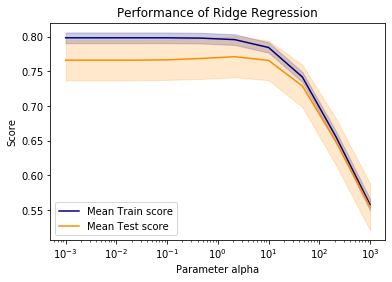

In [24]:
performance(Ridge(),param_grid={'ridge__alpha': np.logspace(-3, 3, 10)},label='Parameter alpha',title = 'Performance of Ridge Regression')


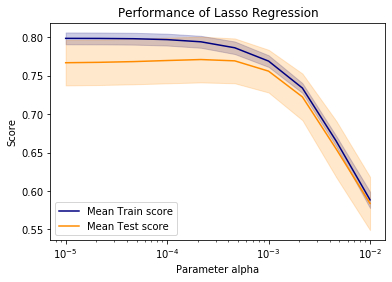

In [25]:
performance(Lasso(),param_grid={'lasso__alpha': np.logspace(-5, -2, 10)},label='Parameter alpha',title = 'Performance of Lasso Regression')


In [26]:
# round alpha
grid_elasticnet.cv_results_['param_elasticnet__alpha'] = list(map(lambda x:round(x,3),grid_elasticnet.cv_results_['param_elasticnet__alpha']))


In [27]:
# Analyzing grid-search results of ElasticNet with heatmap(2D gridsearch visualization)
res = pd.pivot_table(pd.DataFrame(grid_elasticnet.cv_results_),values='mean_test_score', index='param_elasticnet__alpha', columns='param_elasticnet__l1_ratio')



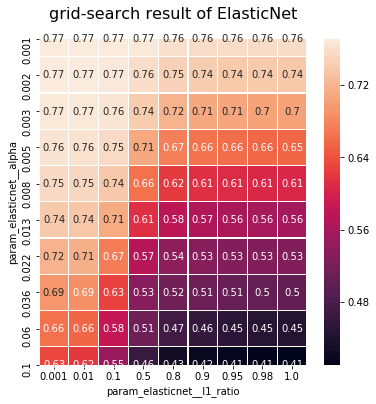

In [28]:
# plot heatmap
fig, ax = plt.subplots(figsize=(6,6)) 
sns.heatmap(res,annot = True,linewidths=.2, ax=ax)

plt.title('grid-search result of ElasticNet',fontsize =16, pad=20)

plt.show()

### 2.6 Visualize the 20 most important coefficients of the resulting models. Do they agree on which features are important?

In [29]:
# visualize coefficients for Lasso Regression
def coef_visualization(model):
    categorical = X_train.dtypes == 'category'

    categorical_preprocess = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'),
    SimpleImputer(strategy = 'constant')
    )

    continuous_preprocess = make_pipeline(
    SimpleImputer(),StandardScaler()
    )

    preprocess_scale = make_column_transformer(
    (categorical_preprocess,categorical),
    (continuous_preprocess,~categorical))

    model_pipe = make_pipeline(preprocess_scale, model)
    model_pipe.fit(X_train, y_train)

    coef = model_pipe.steps[1][1].coef_
    return coef

In [30]:
coef_lasso = coef_visualization(Lasso(alpha = 0.0001, max_iter = 200))

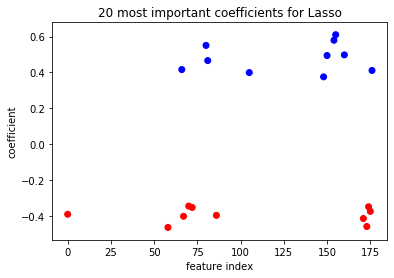

In [31]:
# scatter plot for Lasso
coef = [(index, value) for (index, value) in enumerate(coef_lasso)]
coef = sorted(coef, key = lambda x: abs(x[1]), reverse = True)[:20]
x = [c[0] for c in coef]
y = [c[1] for c in coef]
plt.scatter(x, y, c=np.sign(y), cmap="bwr_r")
plt.title('20 most important coefficients for Lasso')
plt.xlabel('feature index')
plt.ylabel('coefficient')
plt.show()

In [32]:
coef_ridge = coef_visualization(Ridge(alpha = 2.15))

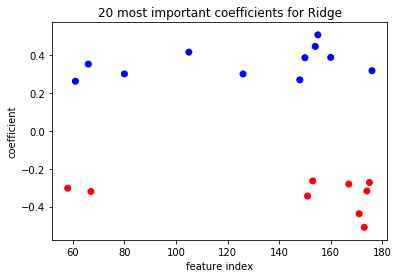

In [33]:
# scatter plot for Ridge
coef = [(index, value) for (index, value) in enumerate(coef_ridge)]
coef = sorted(coef, key = lambda x: abs(x[1]), reverse = True)[:20]
x = [c[0] for c in coef]
y = [c[1] for c in coef]
plt.scatter(x, y, c=np.sign(y), cmap="bwr_r")
plt.title('20 most important coefficients for Ridge')
plt.xlabel('feature index')
plt.ylabel('coefficient')
plt.show()

In [34]:
coef_elasticnet = coef_visualization(ElasticNet(alpha = 0.001, l1_ratio = 0.1, max_iter = 200))

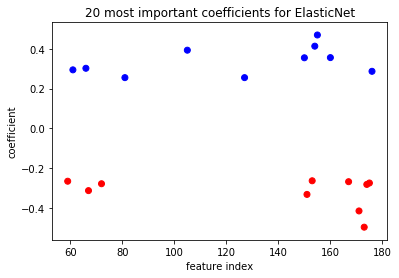

In [35]:
# scatter plot for ElasticNet
coef = [(index, value) for (index, value) in enumerate(coef_elasticnet)]
coef = sorted(coef, key = lambda x: abs(x[1]), reverse = True)[:20]
x = [c[0] for c in coef]
y = [c[1] for c in coef]
plt.scatter(x, y, c=np.sign(y), cmap="bwr_r")
plt.title('20 most important coefficients for ElasticNet')
plt.xlabel('feature index')
plt.ylabel('coefficient')
plt.show()

1. Do they agree on which features are important?
    - Ridge and ElasticNet show similar pattern but do not agree 100 percent. And Lasso shows different pattern and absolute coefficients compared with the other two.